# TensorFlow Implementation of Convolutional Neural Networks

In TensorFlow, each input image is typically represented as 3D tensor of shape [height, width, channels]. A mini-batch represented as 4D tensor of shape [mini-batch size, height, width, channels]. The weight of the convolutional layer are represented as a 4D tensor of shape [$f_h, f_w, f_n, f_{n^{'}}$].

The bias terms of convolutional layer are simply represented as a 1D tensor of shape [$f_n$].

The following code loads two sample images, using  Scikit-Learn's load_sample_images() (Chinese temple and flower). Then it creates a 7x7 filters (vertical and horizontal), and applies them to both images using a convolutional layer built using TensorFlow's conv2d() function (with zero padding and stride of 2). 

Finally it plots one of the resulting feature maps.

In [13]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt

In [14]:
#Load sample images
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape

/Users/siddharth/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/siddharth/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [21]:
#Creating the 2 filters
filters_test = np.zeros(shape = (7,7, channels, 2), dtype = np.float32)
filters_test[:, 3, :,0] = 1 #vertical line
filters_test[3,:,:,1] = 1 #horizontal line

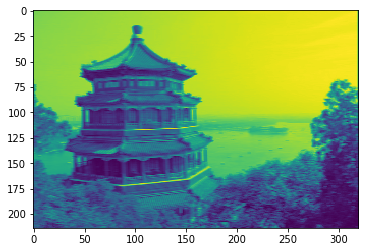

In [27]:
#Create a graph with input x plus a convolutional layer applying two filters

X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
#Stride has 4 values because of 4 dimensions in our input X
convolution = tf.nn.conv2d(X, filters_test, strides = [1,2,2,1], padding = "SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict = {X: dataset})
    
plt.imshow(output[0,:,:,1]) #plot 1st image's 2nd feature map
plt.show()

The conv2d() command has the following interpretation:

- X is the input mini-batch(a 4D tensor as explained earlier)
- filters is the set of filters to apply(also a 4D tensor)
- strides is a four element 1D array, where two central elements are the vertical and horizontal strides ($s_h$ and $s_w$). The first and last element must currently be equal to 1. They may one day be used to specify a batch stride (to skip some instances  and a channel stride (to skip some of the previous layer's feature maps or channels).
- Padding must either be "VALID" or "SAME":
If set to "VALID" the convolutional layer does not use zero padding, and may ignore some rows and columns at the bottom and right of the input image.

Unfortunately, convolutional layers require quite a few hyperparameters to tune: you must choose the number of filters, their height and width, the strides and the padding type. 

As always you can use cross-validation to find the right hyperparameter values, but this is time consuming. 

## Memory Requirement

If training crashes because of an out-of-memory error you can try reducing mini-batch size. Alternatively, try reducing dimensioality by increasing strides or removing a few layers. Or try using 16-bit float instead of 32-bit floats. Or distribute CNN across multiple devices.


## Pooling Layer

The goal of pooling layer is to subsample (i.e. shrink) the input image in order to reduce the computational load, the memory usage and the number of parameters. Reducing the input image size also makes the NN tolerate a little bit of image shift (location invariance).

Just like convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in previous layer, located within a small rectangular receptive field. 

Pooling neuron has no weights; all it does is aggeregate the input using an aggregation function such as max or mea.

Implementing maxpool layer using the following code:


In [29]:
#Load the image dataset
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape

/Users/siddharth/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/siddharth/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


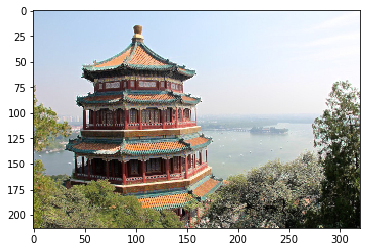

In [36]:
#Create a graph with input X plus max pooling layer

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides = [1,2,2,1],
                         padding = "VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X: dataset})
    
plt.imshow(output[0].astype(np.uint8)) #plot output of 1st image
plt.show()

The ksize argument contains the kernal shape along all four dimensions of the input tensor: [batch size, height, width, channels]. TensorFlow currently does not support pooling over multiple instances, so the first element of ksize must be equal to 1. Moreover, it does not support pooling over both the spatial dimensions (height and width) and the depth dimension, so either ksize[1] and ksize[2] must both be equal to 1 or ksize[3] must be equal to 1.